In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [4]:
df = pd.read_csv('../jeee16t08.csv', index_col=0)
df.drop(df.index[0],inplace=True)

In [5]:
df.isnull().sum()

Population 2016                             0
Total justice system PC                     0
Police Protection PC                        0
Judicial and legal PC                       0
Corrections PC                              0
Total justice system Employment             0
police protection Total Employment          0
police protection Sworn only Employment     0
Judicial and legal Employment               0
Corrections Employment                      0
dtype: int64

In [6]:
df.columns = ['Population_2016','Total_justice_system_PC','Police_Protection_PC','Judicial_and_legal_PC','Corrections_PC','Total_justice_system_Employment','police_protection_Total_Employment','police_protection_Sworn_only_Employment','Judicial_and_legal_Employment','Corrections_Employment']

<AxesSubplot:xlabel='Total Justice System PC', ylabel='2016 Population'>

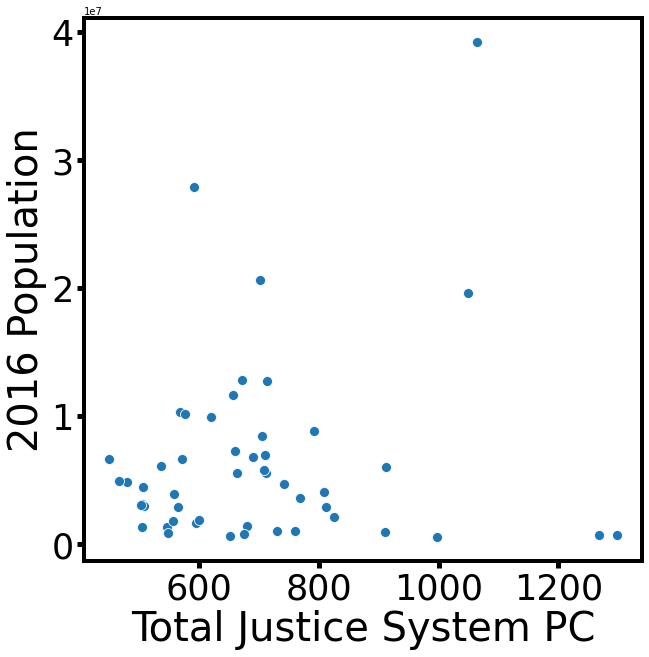

In [7]:
plt.tick_params(axis='both',labelsize='35', length=7, width=5)
plt.ylabel("2016 Population", fontsize=40)
plt.xlabel("Total Justice System PC", fontsize=40)
sns.scatterplot(x='Total_justice_system_PC',y='Population_2016',data=df, s=100)


# Data Preprocessing

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA()
pca.fit(df_scaled)
variance = pca.explained_variance_ratio_.round(3)
eigenvalue = pca.explained_variance_

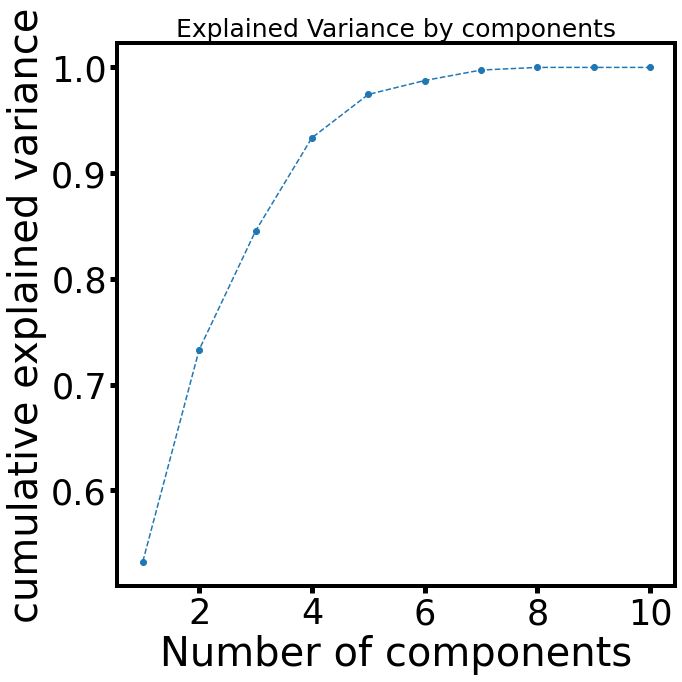

In [9]:
x = range(1,11)
y = pca.explained_variance_ratio_.cumsum()
plt.plot(x,y,marker='o',linestyle='--')
plt.tick_params(axis='both',labelsize='35', length=7, width=5)
plt.title("Explained Variance by components", fontsize=25)
plt.xlabel("Number of components", fontsize=40)
plt.ylabel("cumulative explained variance", fontsize=40)
plt.show()

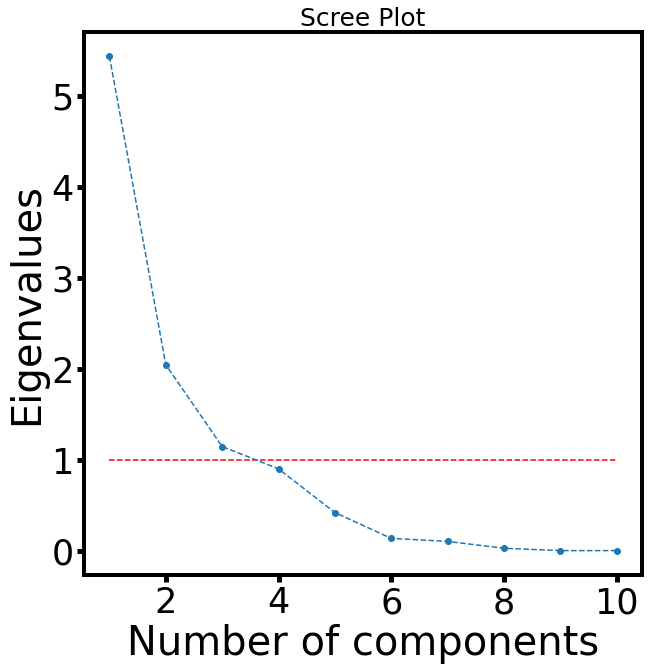

In [10]:
y = eigenvalue
plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o',linestyle='--')
plt.tick_params(axis='both',labelsize='35', length=7, width=5)
plt.title("Scree Plot", fontsize=25)
plt.xlabel("Number of components", fontsize=40)
plt.ylabel("Eigenvalues", fontsize=40)
plt.hlines(1, 1, 10, colors='r', linestyles='dashed')
plt.show()

In [11]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
pca.transform(df_scaled)
scores_pca = pca.transform(df_scaled)

# Determine number of clusters for K mean

In [12]:
#K Means Clustering using PCA
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

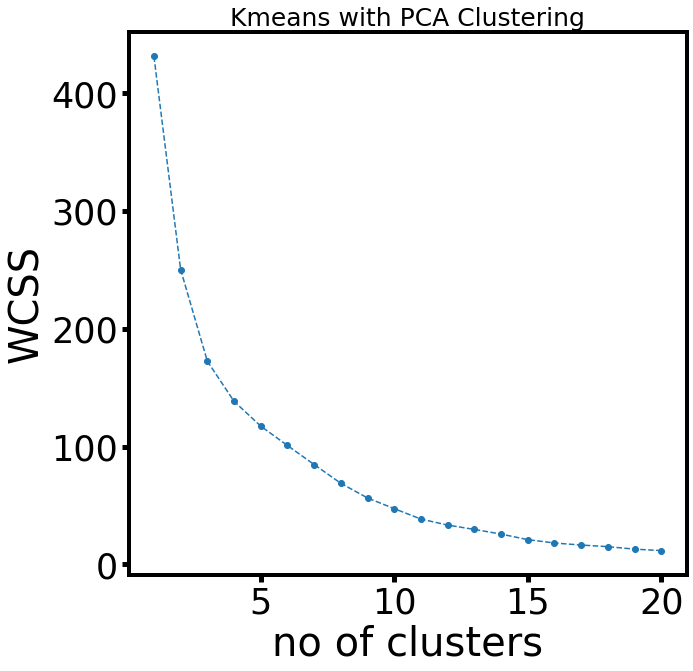

In [13]:
plt.figure(figsize=(10,10))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.tick_params(axis='both',labelsize='35', length=7, width=5)
plt.xlabel('no of clusters', fontsize=40)
plt.ylabel('WCSS', fontsize=40)
plt.title('Kmeans with PCA Clustering', fontsize=25)
plt.show()

In [14]:
# Number of clusters =4
kmeans_pca = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)
# Create new dataframe with original Features and PCA scores and assigned clusters
df_pca_seg_Kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_seg_Kmeans.columns.values[-3:] = ['component_1','component_2','component_3']
df_pca_seg_Kmeans['Segment_KMeans_PCA'] =kmeans_pca.labels_ 
df_pca_seg_Kmeans['Segment'] = df_pca_seg_Kmeans['Segment_KMeans_PCA'].map({0:'First',1:'Second',2:'Third',3:'Fourth'})

# Visualizing the components

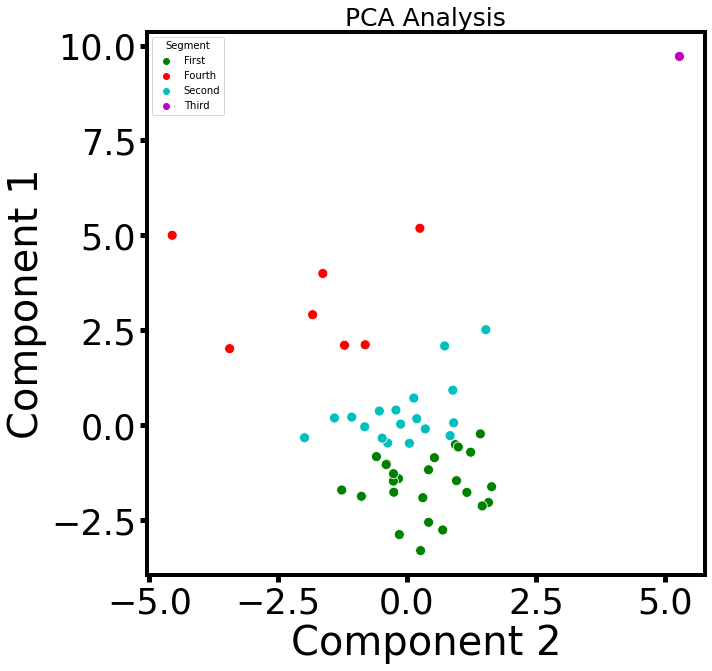

In [15]:
x_axis = df_pca_seg_Kmeans['component_2']
y_axis = df_pca_seg_Kmeans['component_1']

plt.tick_params(axis='both',labelsize='35', length=7, width=5)
plt.ylabel("Component 1", fontsize=40)
plt.xlabel("Component 2", fontsize=40)
sns.scatterplot(x=x_axis,y=y_axis,hue=df_pca_seg_Kmeans['Segment'],palette=['g','r','c','m'], s=100)
plt.title('PCA Analysis',fontsize=25)
plt.show()

In [16]:
df1 = df.copy()
df1.reset_index(inplace=True)
df_pca_seg_Kmeans['State'] = df1['State']
df_pca_seg_Kmeans[df_pca_seg_Kmeans['Segment']=='First']['State']

0            Alabama
3           Arkansas
12             Idaho
13          Illinois
14           Indiana
15              Iowa
16            Kansas
17          Kentucky
19             Maine
22          Michigan
23         Minnesota
24       Mississippi
25          Missouri
27          Nebraska
29     New Hampshire
33    North Carolina
36          Oklahoma
40    South Carolina
41      South Dakota
42         Tennessee
43             Texas
44              Utah
45           Vermont
47        Washington
48     West Virginia
Name: State, dtype: object

In [17]:
df_pca_seg_Kmeans[df_pca_seg_Kmeans['Segment']=='Second']['State']

2           Arizona
5          Colorado
6       Connecticut
9           Florida
10          Georgia
11           Hawaii
18        Louisiana
21    Massachusetts
26          Montana
28           Nevada
30       New Jersey
34     North Dakota
35             Ohio
37           Oregon
38     Pennsylvania
39     Rhode Island
46         Virginia
49        Wisconsin
Name: State, dtype: object

In [18]:
df_pca_seg_Kmeans[df_pca_seg_Kmeans['Segment']=='Third']['State']

8    District of Columbia
Name: State, dtype: object

In [19]:
df_pca_seg_Kmeans[df_pca_seg_Kmeans['Segment']=='Fourth']['State']

1         Alaska
4     California
7       Delaware
20      Maryland
31    New Mexico
32      New York
50       Wyoming
Name: State, dtype: object

<AxesSubplot:xlabel='Total Justice System PC', ylabel='2016 Population'>

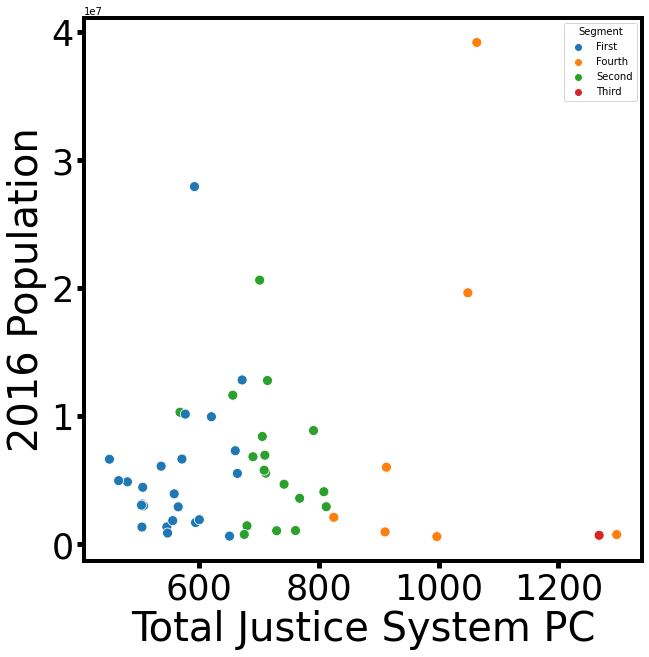

In [20]:
plt.tick_params(axis='both',labelsize='35', length=7, width=5)
plt.ylabel("2016 Population", fontsize=40)
plt.xlabel("Total Justice System PC", fontsize=40)
sns.scatterplot(x='Total_justice_system_PC',y='Population_2016',hue='Segment',data=df_pca_seg_Kmeans, s=100)